In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import sklearn.metrics

In [2]:
#to remove warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [3]:
#reading the data
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#gathering general information
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


,age,bmi,children,charges,smoker_index,sex_index
age,1.000000,0.109272,0.042469,0.299008,-0.025019,-0.020856
bmi,0.109272,1.000000,0.012759,0.198341,0.003750,0.046371
children,0.042469,0.012759,1.000000,0.067998,0.007673,0.017163
charges,0.299008,0.198341,0.067998,1.000000,0.787251,0.057292
smoker_index,-0.025019,0.003750,0.007673,0.787251,1.000000,0.076185
sex_index,-0.020856,0.046371,0.017163,0.057292,0.076185,1.000000


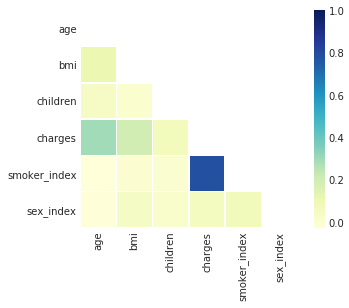

In [5]:
#correlation heatmap
data['smoker_index'] = data.smoker.map(dict(yes = 1, no = 0))
data['sex_index'] = data.sex.map(dict(male = 1, female = 0))
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask = mask, square=True, linewidths=.5, cmap="YlGnBu")

fig = ax.get_figure()
fig.savefig('correlation.png')
corr

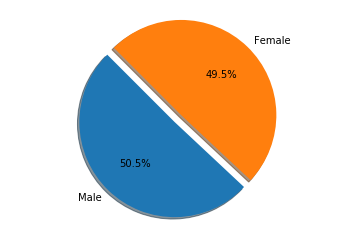

In [6]:
#exploratory analysis based on sex
gender_count = data['sex'].value_counts()
gender_count
labels = 'Male', 'Female'
explode = (0, 0.1)
plt.pie(gender_count, labels = labels, explode = explode, autopct = '%1.1f%%', shadow = True, startangle = 135)
plt.axis('equal')
plt.savefig('male-female-ratio.png')

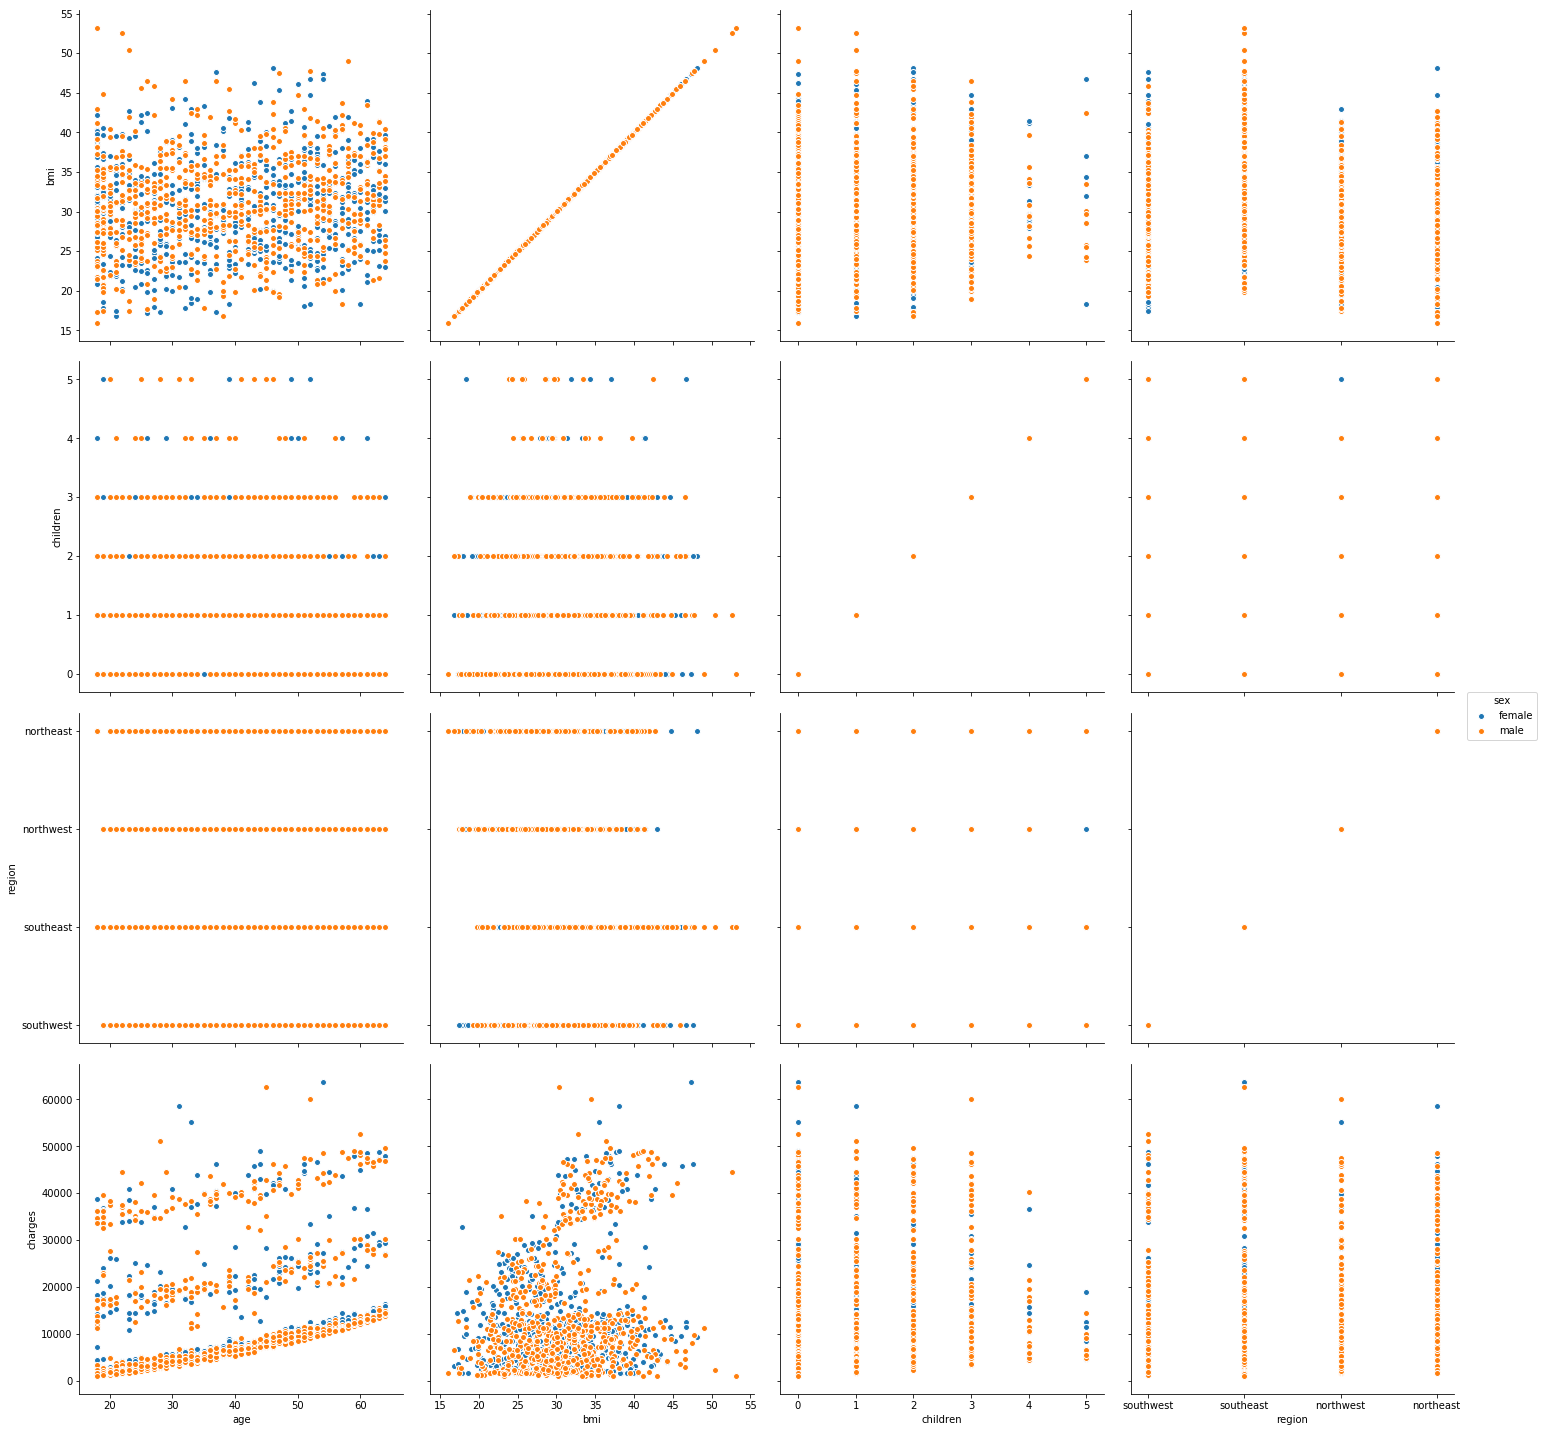

In [7]:
ax = sns.pairplot(data, hue = 'sex', diag_kind = 'kde', x_vars=['age', 'bmi', 'children','region'], size=5, y_vars=['bmi', 'children','region','charges'])
ax.savefig('pair-plot.png')

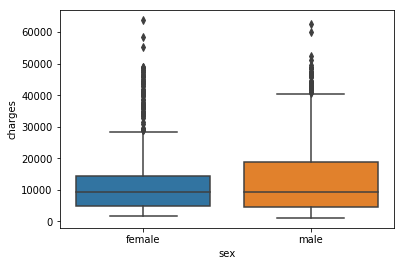

In [8]:
ax = sns.boxplot(x="sex", y="charges", data=data)
ax.get_figure().savefig('male-female-charges-boxplot.png')

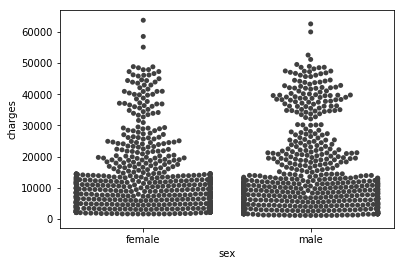

In [9]:
ax = sns.swarmplot(x="sex", y="charges", data=data, color=".25")
ax.get_figure().savefig('male-female-charges-swarmplot.png')

In [10]:
pivot = data.pivot_table(index='sex', values='charges', aggfunc=[np.mean, np.median, np.min, np.max])
pivot

,mean,median,amin,amax
,charges,charges,charges,charges
sex,,,,
female,12569.578844,9412.96250,1607.5101,63770.42801
male,13956.751178,9369.61575,1121.8739,62592.87309


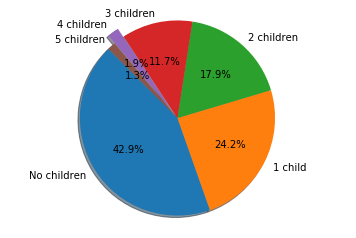

In [11]:
#exploratory analysis based on number of children
no_of_children = data['children'].value_counts()
labels = 'No children', '1 child', '2 children', '3 children', '4 children', '5 children'
explode = (0, 0, 0, 0, 0.1, 0)
plt.pie(no_of_children, labels = labels, explode = explode, autopct = '%1.1f%%', shadow = True, startangle = 135)
plt.axis('equal')
plt.savefig('children-wise-exp-an.png')

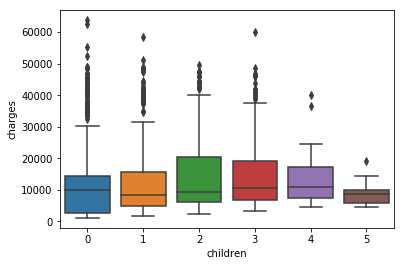

In [12]:
ax = sns.boxplot(x="children", y="charges", data=data)
ax.get_figure().savefig('children-wise-charges-boxplot.png')

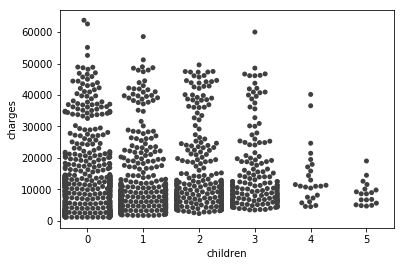

In [13]:
ax = sns.swarmplot(x="children", y="charges", data=data, color=".25")
ax.get_figure().savefig('children-wise-charges-swarmplot.png')

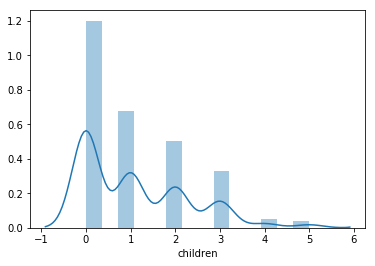

In [14]:
from scipy.stats import norm
ax = sns.distplot(data['children'])
ax.get_figure().savefig('children-wise-distplot.png')

In [15]:
pivot = data.pivot_table(index='children', values='charges', aggfunc=[np.mean, np.median, np.min, np.max])
pivot

,mean,median,amin,amax
,charges,charges,charges,charges
children,,,,
0,12365.975602,9856.95190,1121.8739,63770.42801
1,12731.171832,8483.87015,1711.0268,58571.07448
2,15073.563734,9264.97915,2304.0022,49577.66240
3,15355.318367,10600.54830,3443.0640,60021.39897
4,13850.656311,11033.66170,4504.6624,40182.24600
5,8786.035247,8589.56505,4687.7970,19023.26000


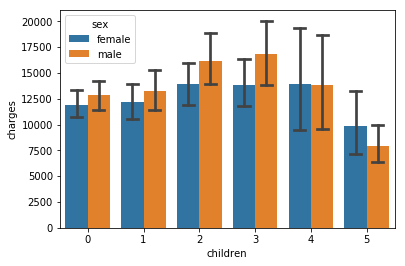

In [16]:
#charges based on sex and number of children
ax = sns.barplot(x="children", y="charges", hue ="sex", data=data, capsize=.2)
ax.get_figure().savefig('children-wise-charges-barplot.png')

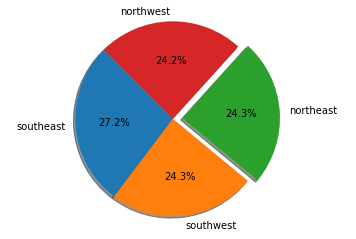

In [17]:
#exploratory analysis based on region
regon_index = data['region'].value_counts()
labels = ['southeast','southwest','northeast','northwest']
explode = ( 0, 0, 0.1, 0)
plt.pie(regon_index, labels = labels, explode = explode, autopct = '%1.1f%%', shadow = True, startangle = 135)
plt.axis('equal')
plt.savefig('regionwise-exp-an.png')

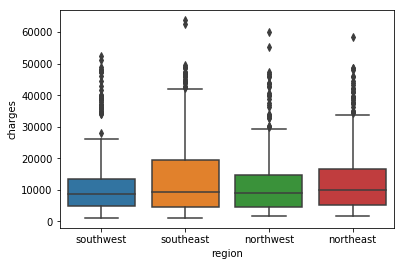

In [18]:
sns.boxplot(x='region', y='charges', data=data)
ax.get_figure().savefig('xyz.png')

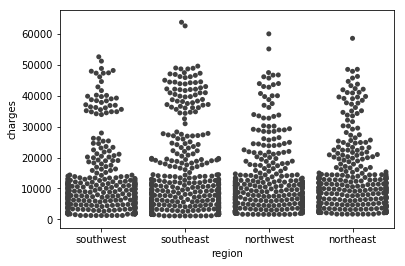

In [19]:
ax = sns.swarmplot(x="region", y="charges", data=data, color=".25")
ax.get_figure().savefig('region-wise-charges-swarmplot.png')

In [20]:
pivot = data.pivot_table(index='region', values='charges', aggfunc=[np.mean, np.median, np.min, np.max])
pivot

,mean,median,amin,amax
,charges,charges,charges,charges
region,,,,
northeast,13406.384516,10057.652025,1694.7964,58571.07448
northwest,12417.575374,8965.795750,1621.3402,60021.39897
southeast,14735.411438,9294.131950,1121.8739,63770.42801
southwest,12346.937377,8798.593000,1241.5650,52590.82939


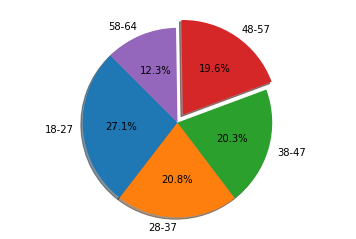

In [21]:
#exploratory analysis based on age
ages = data['age']
data['age_interval'] = pd.cut(ages, bins = [17, 27, 37, 47, 57, 64], labels=False)
labels = np.array('18-27 28-37 38-47 48-57 58-64'.split())
data['age_interval'] = labels[data['age_interval']]

no_of_age_intervals = data['age_interval'].value_counts()
sorted_by_age_interval = data.sort_values(by = ['age_interval'])
labels = '18-27', '28-37', '38-47', '48-57', '58-64'
explode = (0, 0, 0, 0.1, 0)
plt.pie(no_of_age_intervals, labels = labels, explode = explode, autopct = '%1.1f%%', shadow = True, startangle = 135)
plt.axis('equal')
plt.savefig('age-interval-ex-an.png')

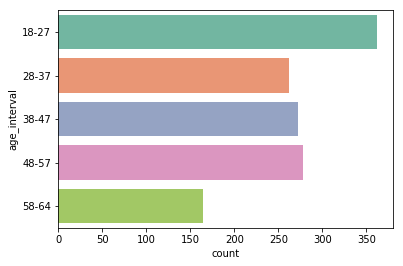

In [22]:
ax = sns.countplot(y="age_interval", data=sorted_by_age_interval, palette="Set2")
ax.get_figure().savefig('age-interval-countplot.png')

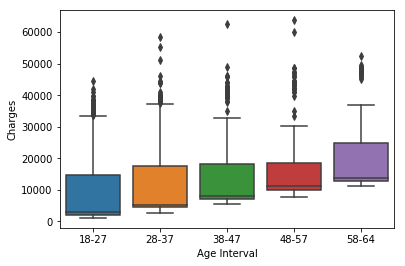

In [23]:
ax = sns.boxplot(x="age_interval", y="charges", data=sorted_by_age_interval)
ax.set(xlabel='Age Interval', ylabel='Charges')
ax.get_figure().savefig('age-interval-boxplot.png')

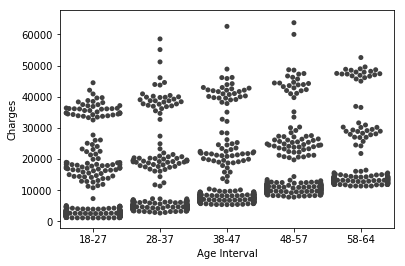

In [24]:
ax = sns.swarmplot(x="age_interval", y="charges", data=sorted_by_age_interval, color=".25")
ax.set(xlabel='Age Interval', ylabel='Charges')
ax.get_figure().savefig('age-interval-swarmplot.png')

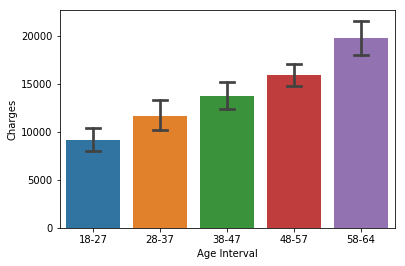

In [25]:
ax = sns.barplot(x="age_interval", y="charges", data=sorted_by_age_interval, capsize=.2)
ax.set(xlabel='Age Interval', ylabel='Charges')
ax.get_figure().savefig('age-interval-barplot.png')

In [26]:
pivot = data.pivot_table(index='age_interval', values='charges', aggfunc=[np.mean, np.median, np.min, np.max])
pivot

,mean,median,amin,amax
,charges,charges,charges,charges
age_interval,,,,
18-27,9098.192248,2876.380525,1121.8739,44501.39820
28-37,11661.811603,5363.719450,2689.4954,58571.07448
38-47,13730.042358,8139.492550,5383.5360,62592.87309
48-57,15937.657552,11084.082000,7789.6350,63770.42801
58-64,19766.124610,13884.076500,11345.5190,52590.82939


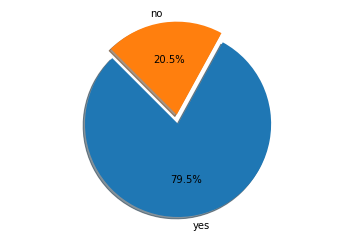

In [27]:
#exploratory analysis based on smoker
smoker_index = data['smoker'].value_counts()
labels = ['yes','no']
explode = ( 0.1, 0)
plt.pie(smoker_index, labels = labels, explode = explode, autopct = '%1.1f%%', shadow = True, startangle = 135)
plt.axis('equal')
plt.savefig('smoker-non-exp-an.png')

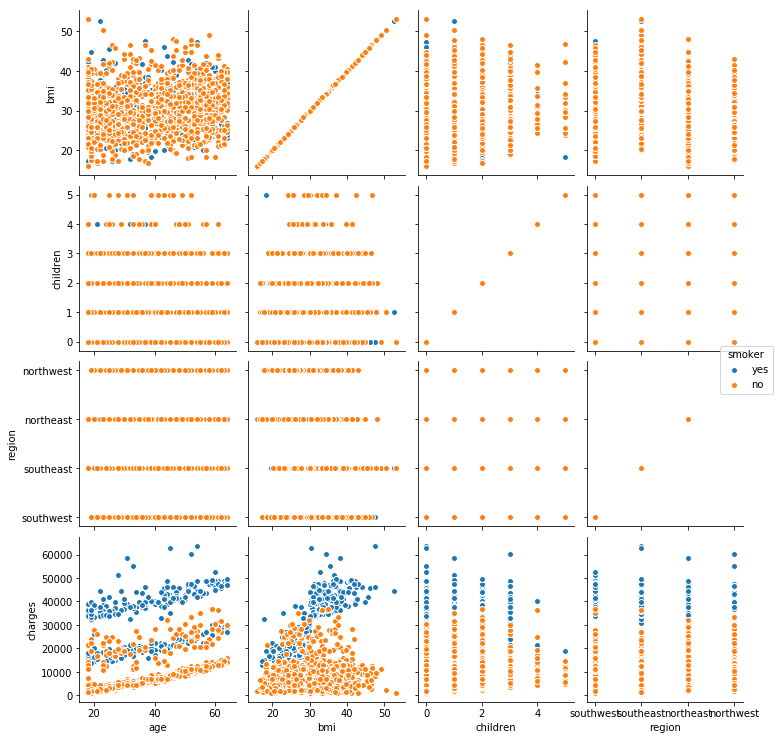

In [28]:
g=sns.pairplot(data, hue='smoker', x_vars=['age', 'bmi', 'children','region'], size=5, y_vars=['bmi', 'children','region','charges'])
g.fig.set_size_inches(10,10)
ax.get_figure().savefig('pairplot-with-smoker-hue.png')

In [29]:
pivot = data.pivot_table(index='smoker', values='charges', aggfunc=[np.mean, np.median, np.min, np.max])
pivot

,mean,median,amin,amax
,charges,charges,charges,charges
smoker,,,,
no,8434.268298,7345.40530,1121.8739,36910.60803
yes,32050.231832,34456.34845,12829.4551,63770.42801


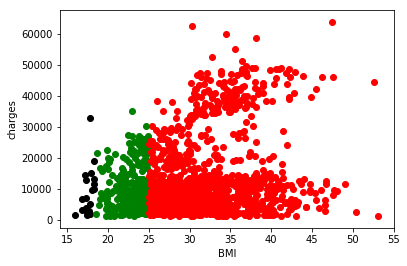

In [30]:
#exploratory analysis based on BMI
low = data.query('bmi<18.5')
good = data.query('bmi>18.5 & bmi<=25')
high = data.query('bmi>25')
plt.scatter(low['bmi'].tolist(), low['charges'].tolist(),color='black')
plt.scatter(good['bmi'].tolist(), good['charges'].tolist(),color='green')
plt.scatter(high['bmi'].tolist(), high['charges'].tolist(),color='red')
plt.xlabel('BMI')
plt.ylabel('charges')
plt.savefig('bmi-charges-scatter-plot.png')

In [31]:
low.describe()

,age,bmi,children,charges,smoker_index,sex_index
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,32.350000,17.566250,1.050000,8852.200585,0.250000,0.400000
std,13.480102,0.608326,1.276302,7735.038364,0.444262,0.502625
min,18.000000,15.960000,0.000000,1621.340200,0.000000,0.000000
25%,21.000000,17.290000,0.000000,2751.631438,0.000000,0.000000
50%,27.500000,17.575000,1.000000,6759.262475,0.000000,0.000000
75%,38.250000,17.978750,2.000000,12923.162737,0.250000,1.000000
max,60.000000,18.335000,5.000000,32734.186300,1.000000,1.000000


In [32]:
good.describe()

,age,bmi,children,charges,smoker_index,sex_index
count,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000
mean,36.893805,22.655442,1.123894,10435.440719,0.221239,0.477876
std,13.669341,1.631081,1.237436,7484.434940,0.416002,0.500619
min,18.000000,18.600000,0.000000,1121.873900,0.000000,0.000000
25%,25.000000,21.561250,0.000000,4146.836312,0.000000,0.000000
50%,36.000000,22.990000,1.000000,8604.153525,0.000000,0.000000
75%,47.750000,24.035000,2.000000,15197.264325,0.000000,1.000000
max,64.000000,25.000000,5.000000,35069.374520,1.000000,1.000000


In [33]:
high.describe()

,age,bmi,children,charges,smoker_index,sex_index
count,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000
mean,39.817599,32.573483,1.089826,13946.476035,0.200733,0.513291
std,14.071792,4.982788,1.199081,12834.725537,0.400733,0.500053
min,18.000000,25.080000,0.000000,1131.506600,0.000000,0.000000
25%,27.000000,28.600000,0.000000,4889.518150,0.000000,0.000000
50%,40.000000,31.900000,1.000000,9563.029000,0.000000,1.000000
75%,52.000000,35.815000,2.000000,17654.442975,0.000000,1.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000


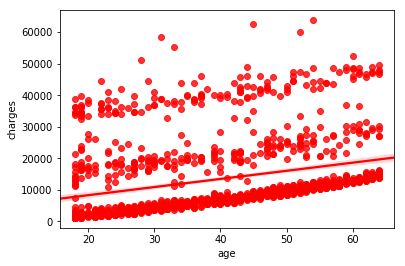

In [34]:
#plotting a line to see if it fits the age vs charges scatter plot using Linear Regression
m_data = data.loc[:,['age','charges']]
#m_data=m_data.query('smoker==yes')
sns.regplot(x='age', y='charges', data=m_data, color='red')

In [74]:
#linear regression
x=data[['bmi','age','children','smoker_index']]
y=data['charges']
m=0
mp=0
pred_max=0
for i in range(1,100):
    p=i/100
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=p)

    lm=linear_model.LinearRegression()
    model=lm.fit(x_train,y_train)
    prediction=lm.predict(x_test)
    r2=r2_score(prediction, y_test)
    if(m<r2):
        m=r2
        pred_max=prediction
        mp=p
print('R2 Score : ',m,'\nTop 5 Predictions : ', pred_max[0:5])
print('test size : ', mp)

R2 Score :  0.8390595837553647 
Top 5 Predictions :  [11604.52472701  7354.69638263  9203.10320656 36320.09695043
 15494.03577629]
test size :  0.01
